# 4.9.2 CREATING VISUALIZATIONS

## This script contains the following points:
1. Creating histograms
2. Line chart
3. Bar chart


In [1]:
#importing libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
#importing the newly merged updated data set
path = r'/Users/frankamoboateng/Downloads/18.07.23 instacart Basket Analysis'

In [3]:
#importing the updated merged data
df_ords_prods_all = pd.read_pickle(os.path.join(path,'02. DATA','PREPARED DATA','orders_products_all_aggregated.pkl')) 
                    

In [4]:
#checking rows and columns
df_ords_prods_all.shape

(30657347, 35)

In [5]:
df_ords_prods_all.head()

,user_id,First Name,Surname,gender,State,Age,date_joined,number_of_dependants,marital_status,income,...,add_to_cart_order,reordered,busiest_day,busiest_period_of_day,max_order,loyalty_flag,mean_price,spending_flag,median_days,frequency_flag
0,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,2,0,Busiest days,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer
1,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,1,1,Regularly busy,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer
2,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,2,1,Busiest days,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer
3,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,1,0,Regularly busy,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer
4,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,2,1,Slowest days,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer


# CREATING A HISTOGRAM

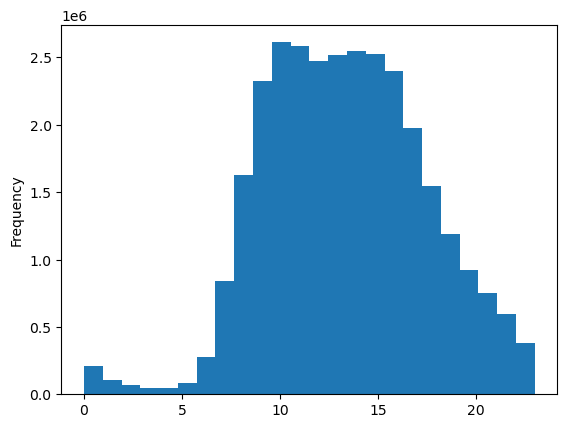

In [6]:
#3 creating a histogram for  order hour of day
hist_orders_hour_of_day = df_ords_prods_all['order_hour_of_day'].plot.hist(bins = 24)

## from the histogram above, we can infer that the peak hours for the order are from before 10am to around 1600hours, and begin to reduce from around 1700hours and beyond 2000 hours

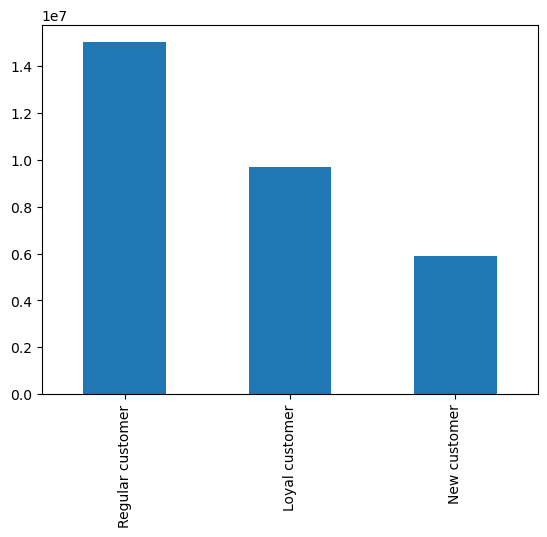

In [8]:
# bar chart for loyalty flag customer
bar_loyalty_flag = df_ords_prods_all['loyalty_flag'].value_counts().plot.bar()

## We can see that regular customers make up the most 

In [9]:
#5 making a accurate subset for making a line chart for prices and order hour of day
np.random.seed(4)
dev = np.random.rand(len(df_ords_prods_all)) <= 0.7

In [10]:
dev

array([False,  True, False, ...,  True,  True,  True])

In [11]:
# big is 70% of DF and small is 30%
big = df_ords_prods_all[dev]

In [12]:
# big is 70% of DF and small is 30%
small = df_ords_prods_all[~dev]

In [13]:
#checking the count 
len(df_ords_prods_all)

30657347

In [14]:
# checking that the big and small data set = the same number 
len(big)+len (small)

30657347

## This gives confidence for accuracy

In [15]:
#making the small df only contain 2 columns and renaming df_2
df_2 = small[['order_hour_of_day','prices']]

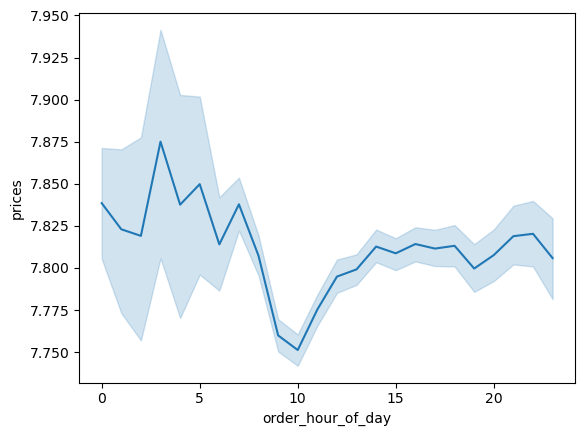

In [16]:
#5 making a line plot with the small df
line_hour_price = sns.lineplot(data = df_2, x = 'order_hour_of_day',y = 'prices')

## From this chart above, we can infer that there is no relationship between prices and order hour of the day

In [17]:
#chekcingcolumn names
df_ords_prods_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30657347 entries, 0 to 30657346
Data columns (total 35 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   user_id                 object 
 1   First Name              object 
 2   Surname                 object 
 3   gender                  object 
 4   State                   object 
 5   Age                     int64  
 6   date_joined             object 
 7   number_of_dependants    int64  
 8   marital_status          object 
 9   income                  int64  
 10  Unnamed: 0              int64  
 11  Unnamed: 0_x            int64  
 12  product_id              int64  
 13  product_name            object 
 14  aisle_id                int64  
 15  department_id           int64  
 16  prices                  float64
 17  Unnamed: 0.2            int64  
 18  Unnamed: 0.1            int64  
 19  Unnamed: 0_y            int64  
 20  order_id                int64  
 21  order_number            int64

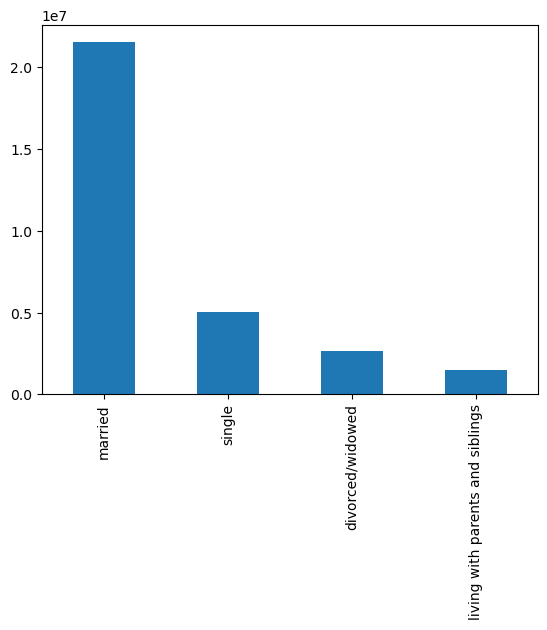

In [18]:
# Bar chart for marital status
bar_marital = df_ords_prods_all['marital_status'].value_counts().plot.bar()

## Married people are the majoriy of customers for instacart 

In [24]:
#6 making age brackets flags column
df_ords_prods_all.loc[df_ords_prods_all['Age'] >= 90, 'Age_bracket'] = '90+'

In [25]:
df_ords_prods_all.loc[(df_ords_prods_all['Age'] <= 89) & (df_ords_prods_all['Age'] >= 80), 'Age_bracket'] = '80-89'

In [26]:
df_ords_prods_all.loc[(df_ords_prods_all['Age'] <= 79) & (df_ords_prods_all['Age'] >= 70), 'Age_bracket'] = '70-79'

In [27]:
df_ords_prods_all.loc[(df_ords_prods_all['Age'] <= 69) & (df_ords_prods_all['Age'] >= 60), 'Age_bracket'] = '60-69'

In [28]:
df_ords_prods_all.loc[(df_ords_prods_all['Age'] <= 59) & (df_ords_prods_all['Age'] >= 50), 'Age_bracket'] = '50-59'

In [30]:
df_ords_prods_all.loc[(df_ords_prods_all['Age'] <= 49) & (df_ords_prods_all['Age'] >= 40), 'Age_bracket'] = '40-49'

In [31]:
df_ords_prods_all.loc[(df_ords_prods_all['Age'] <= 39) & (df_ords_prods_all['Age'] >= 30), 'Age_bracket'] = '30-39'

In [32]:
df_ords_prods_all.loc[(df_ords_prods_all['Age'] <= 29) & (df_ords_prods_all['Age'] >= 20), 'Age_bracket'] = '20-29'

In [33]:
df_ords_prods_all.loc[(df_ords_prods_all['Age'] <= 19) & (df_ords_prods_all['Age'] >= 10), 'Age_bracket'] = '10-19'

In [34]:
#checking the count for the age brackets of IC customers
df_ords_prods_all['Age_bracket'].value_counts(dropna = False)

40-49    4820111
50-59    4809010
30-39    4799516
20-29    4789847
70-79    4788778
60-69    4722388
10-19     965754
80-89     961943
Name: Age_bracket, dtype: int64

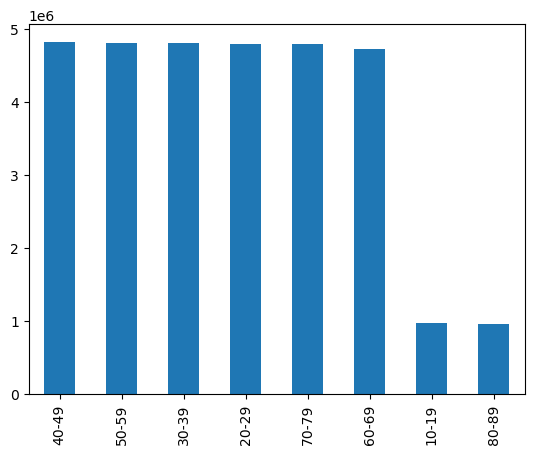

In [35]:
#bar chart for customers age bracket
bar_age_bracket = df_ords_prods_all['Age_bracket'].value_counts().plot.bar()

## We can infer from the chart above that most of instacart customers are aged from 40 to 69 and its less likely they have customers of age between 10 -19, and 80-89

# LINE CHART. 

In [36]:
#making a new df with just 2 columns in the small subset
df_3 = small[['number_of_dependants','Age']]

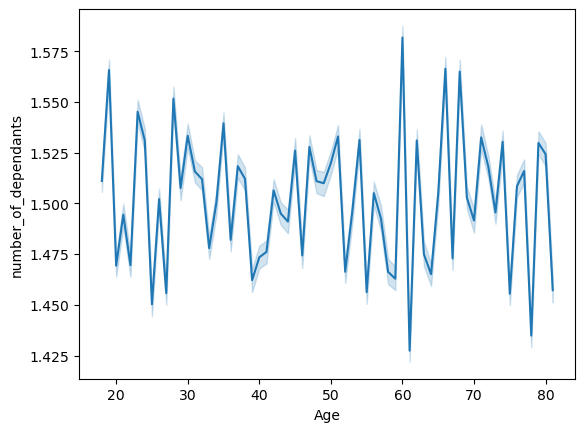

In [37]:
#6 line chart exploring age and number of dependants
line_age_dependants = sns.lineplot(data = df_3, x = 'Age',y = 'number_of_dependants')

## From this line chart we can infer that there is no corelation between Age and the number of dependants among the customer class of instacart 

## SCATTER PLOT 

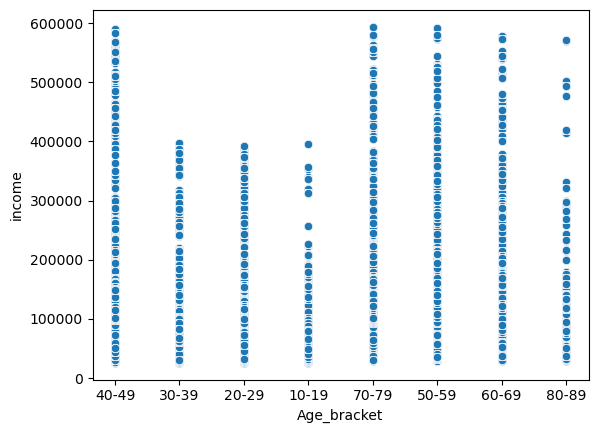

In [39]:
#7 scatterplot of age and income
scatter_age_bracket_income = sns.scatterplot(x = 'Age_bracket', y = 'income',data = df_ords_prods_all)

## From the chart above, we see that. the spending power of age brackets 40 years above is higher than the ages below 40. This suggests a bigger spending power for ages 40+

## SAVING THE VISUALIZATIONS 

In [41]:
hist_orders_hour_of_day.figure.savefig(os.path.join(path, 
                            '04.ANALYSIS','VISUALIZATIONS', 'hist_orders_hour_of_day.jpg'))

In [42]:
bar_loyalty_flag.figure.savefig(os.path.join(path, '04.ANALYSIS','VISUALIZATIONS', 'bar_loyalty_flag.jpg'))

In [43]:
line_hour_price.figure.savefig(os.path.join(path, '04.ANALYSIS','VISUALIZATIONS', 'line_hour_price.jpg'))

In [44]:
bar_marital.figure.savefig(os.path.join(path, '04.ANALYSIS','VISUALIZATIONS', 'bar_marital.jpg'))

In [45]:
bar_age_bracket.figure.savefig(os.path.join(path, '04.ANALYSIS','VISUALIZATIONS', 'bar_age_bracket.jpg'))

In [46]:
line_age_dependants.figure.savefig(os.path.join(path, '04.ANALYSIS','VISUALIZATIONS', 'line_age_dependants.jpg'))

In [47]:
scatter_age_bracket_income.figure.savefig(os.path.join(path, '04.ANALYSIS','VISUALIZATIONS', 
                                                       'scatter_age_income.jpg'))

In [ ]:
#Exporting the merged all data 
#exporting as plk for efficiency sake
df_ords_prods_all.to_pickle(os.path.join(path,'02. DATA','PREPARED DATA','orders_products_all_aggregated.pkl'))